# Finger 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

plt.style.use('default') 
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid")

1) Analizar la distribución de postulaciones a avisos según la fecha, dia del mes, dia de la semana, etc. Algunas de las preguntas que podrían plantearse son: Se recibe un volumen de postulaciones similar cualquier dia de la semana? Existen variaciones según el mes del año, o aun dentro del mes? Etc.

In [2]:
postulaciones = pd.read_csv('data/fiuba_4_postulaciones.csv')
columns_rename = {'idaviso': 'id_aviso', 'idpostulante': 'idpostulante', 'fechapostulacion': 'fecha_postulacion'}
postulaciones = postulaciones.rename(columns=columns_rename)
postulaciones['fecha_postulacion']=pd.to_datetime(postulaciones['fecha_postulacion'])
postulaciones.head()

,id_aviso,idpostulante,fecha_postulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [3]:
#Chequeando si esta todo ok
postulaciones.isnull().any()

id_aviso             False
idpostulante         False
fecha_postulacion    False
dtype: bool

In [4]:
#Cuantos dias de postulaciones tenemos?
postulaciones['fecha_postulacion'].dt.date.value_counts().size

45

Distribución de postulaciones por dia de semana

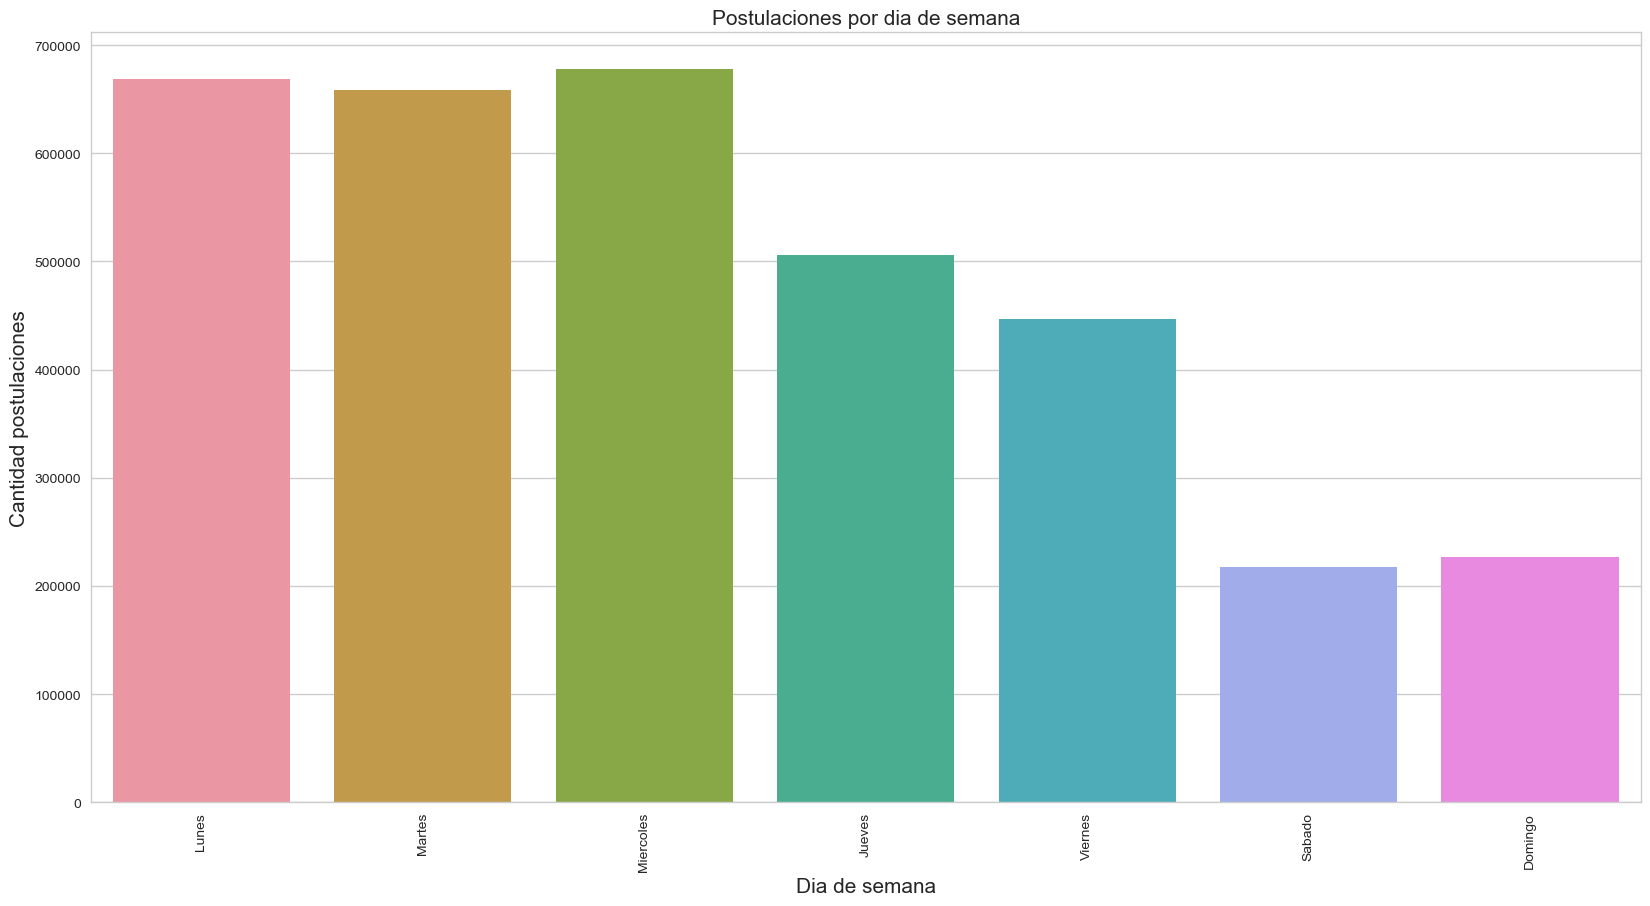

In [5]:
dayTranslation = {'Monday':'Lunes', 'Tuesday': 'Martes', 'Wednesday':'Miercoles', 'Thursday':'Jueves', 'Friday':'Viernes', 'Saturday':'Sabado', 'Sunday':'Domingo'}
postulaciones['dia_semana'] = postulaciones['fecha_postulacion'].dt.weekday_name.map(lambda x: dayTranslation[x])
g = sns.countplot(x='dia_semana', data=postulaciones, order=list(dayTranslation.values()), orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dia de semana", fontsize=15)
g.set_ylabel("Cantidad postulaciones", fontsize=15)
g.set_title("Postulaciones por dia de semana", fontsize=15)

Vemos que los días Lunes, Martes y Miércoles son los dias en los que se realizan mayor cantidad de postulaciones.
Sábados y Domingos son los dias en que hay una menor cantidad de postulaciones.

Vamos a analizar la confiabilidad de los datos. Tenemos las postulaciones de 45 dias, queremos asegurarnos que
- No hay saltos de dias
- La cantidad de dias de la semana es pareja

Esto posiblemente no sume mucho en un informe, o deberia estar hecho fuera del informe.

In [6]:
days = pd.Series(list(postulaciones['fecha_postulacion'].dt.date.value_counts().index))

In [7]:
pd.to_datetime(days).dt.weekday_name.value_counts()

Wednesday    7
Tuesday      7
Monday       7
Sunday       6
Saturday     6
Friday       6
Thursday     6
dtype: int64

In [8]:
pd.to_datetime(days).dt.year.value_counts()

2018    45
dtype: int64

In [9]:
pd.to_datetime(days).dt.month.value_counts()

2    28
1    17
dtype: int64

In [10]:
pd.to_datetime(days).dt.day.value_counts().sort_index()

1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    2
16    2
17    2
18    2
19    2
20    2
21    2
22    2
23    2
24    2
25    2
26    2
27    2
28    2
29    1
30    1
31    1
dtype: int64

Los datos son desde el 15 de enero al 28 de Febrero del 2018. Tenemos 7 semanas de datos.

In [11]:
def get_week_label_for_january(day):
    if day<=20: return '01 - 3er sem ene'
    if day<=27: return '02 - 4ta sem ene'
    if day<=31: return '03 - 5ta sem ene'
    return '-'

def get_week_label_for_february(day):
    if day<=3: return '04 - 1er sem feb'
    if day<=10: return '05 - 2da sem feb'
    if day<=17: return '06 - 3er sem feb'
    if day<=24: return '07 - 4ta sem feb'
    if day<=28: return '08 - 5ta sem feb'
    return '-'

def get_week_label(date):
    if(date.month==1): return get_week_label_for_january(date.day)
    return get_week_label_for_february(date.day)

postulaciones['semana'] = postulaciones['fecha_postulacion'].map(get_week_label)

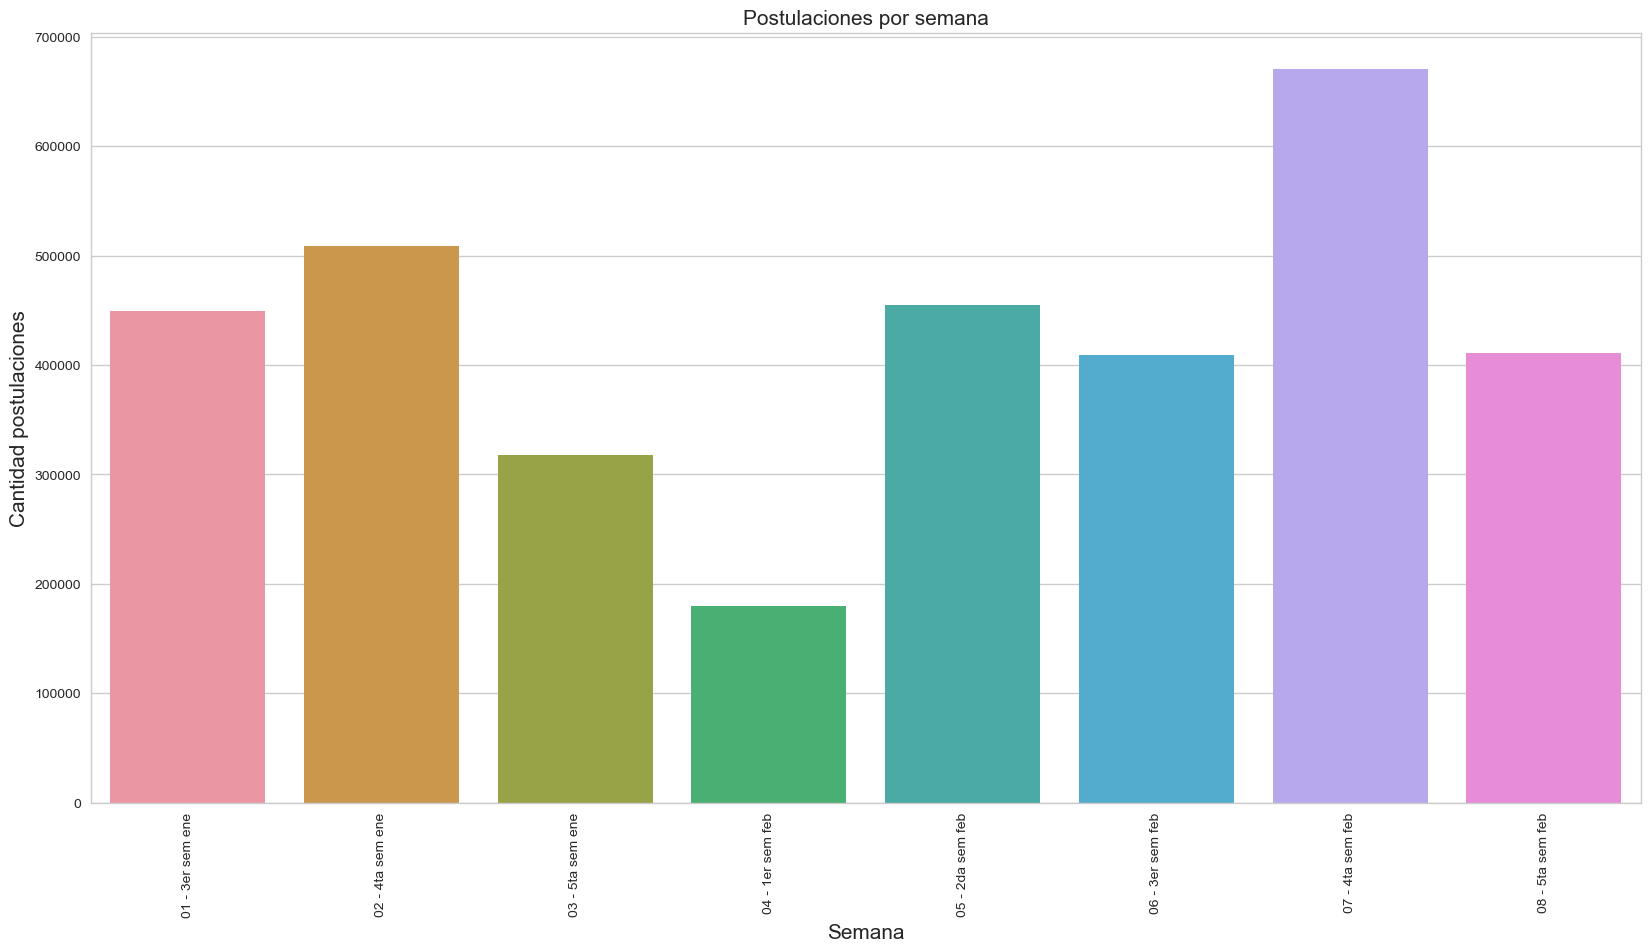

In [12]:
week_label_order = ['01 - 3er sem ene', '02 - 4ta sem ene', '03 - 5ta sem ene', '04 - 1er sem feb', '05 - 2da sem feb', '06 - 3er sem feb', '07 - 4ta sem feb', '08 - 5ta sem feb']
g = sns.countplot(x='semana', data=postulaciones, order=week_label_order, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Semana", fontsize=15)
g.set_ylabel("Cantidad postulaciones", fontsize=15)
g.set_title("Postulaciones por semana", fontsize=15)

La 4ta semana de Febrero es la más popular de todas las semanas, es el momento en que todavía no fin de mes.

In [13]:
for_heatmap = postulaciones.pivot_table(index='semana', columns='dia_semana', values='id_aviso', aggfunc='count')
for_heatmap = for_heatmap[['Domingo', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado']]

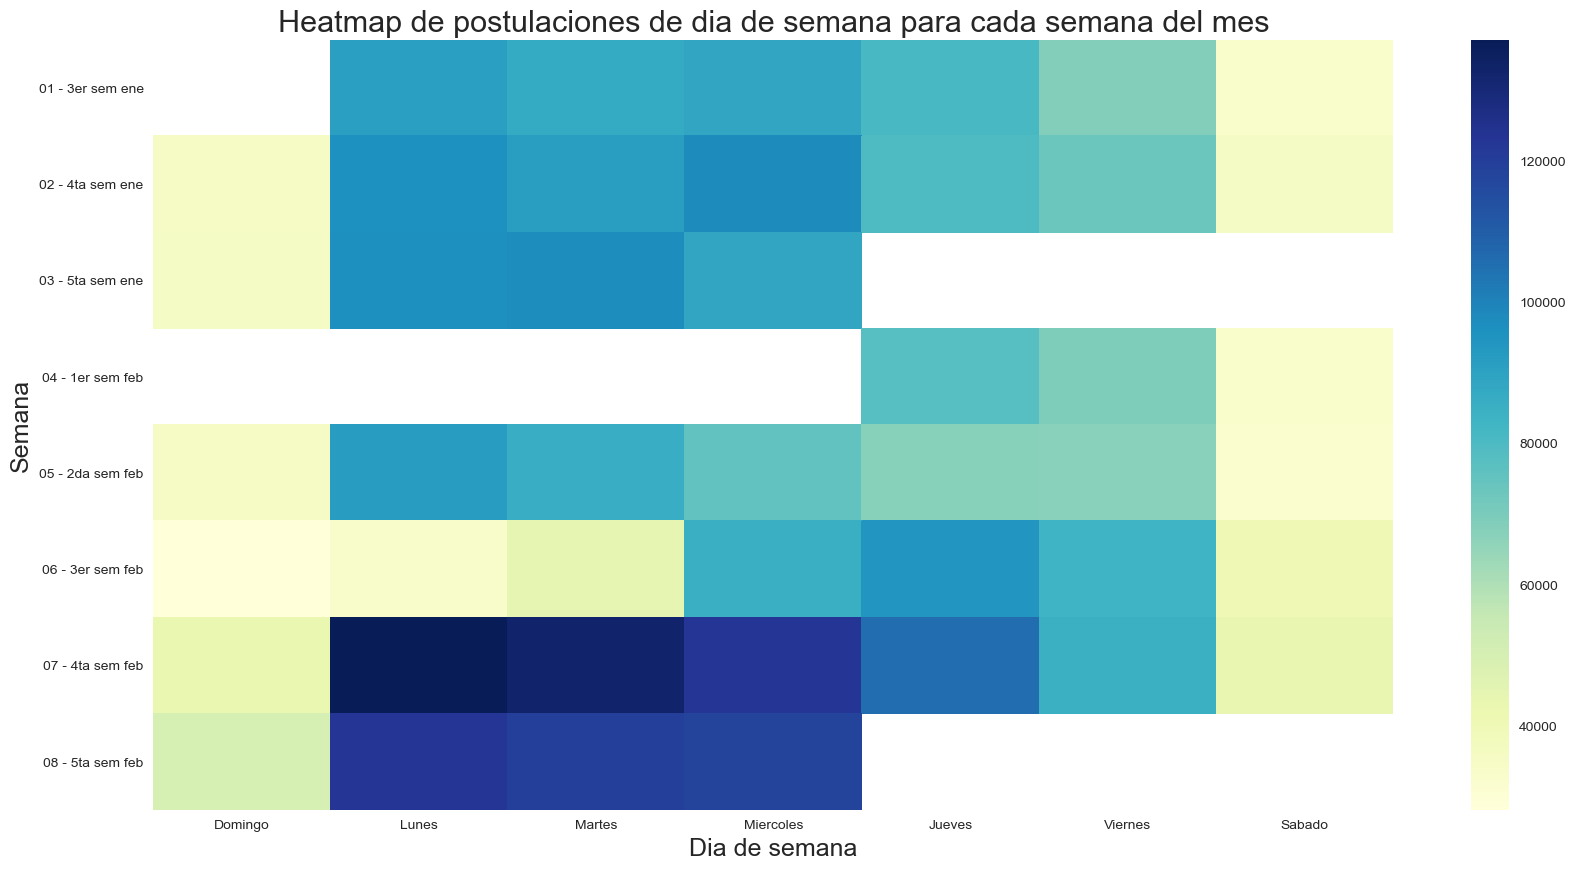

In [14]:
g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Heatmap de postulaciones de dia de semana para cada semana del mes", fontsize=22)
g.set_xlabel("Dia de semana",fontsize=18)
g.set_ylabel("Semana", fontsize=18)

La distribución de postulaciones por dia de la semana es bastante homogenea. Se observan los siguientes patrones
- Las últimas dos semanas de cada mes son en las que hay mayor cantidad de postulaciones
- Si comparamos los dos meses del set de datos Febrero tiene una cantidad mayor de postulaciones
- En los dias Lunes 12 y Martes 13 de Febrero hay un demanda muy menor, que resulta raro para esos dias de semana que son los más populares y sobre todo en el mes de Febrero. Nos podríamos arriegar a decir que hubo algun problema tecnico, juego mis fichas a un release malo el Domingo 11 de Febrero por la noche...

In [30]:
postulaciones_lunes_febrero = postulaciones[postulaciones['fecha_postulacion'].dt.month==2]
postulaciones_lunes_febrero = postulaciones_lunes_febrero[postulaciones_lunes_febrero['fecha_postulacion'].dt.day>3]
postulaciones_lunes_febrero = postulaciones_lunes_febrero[postulaciones_lunes_febrero['dia_semana']=='Lunes']
postulaciones_lunes_febrero.semana.value_counts()

07 - 4ta sem feb    137104
08 - 5ta sem feb    122688
05 - 2da sem feb     91680
06 - 3er sem feb     33669
Name: semana, dtype: int64

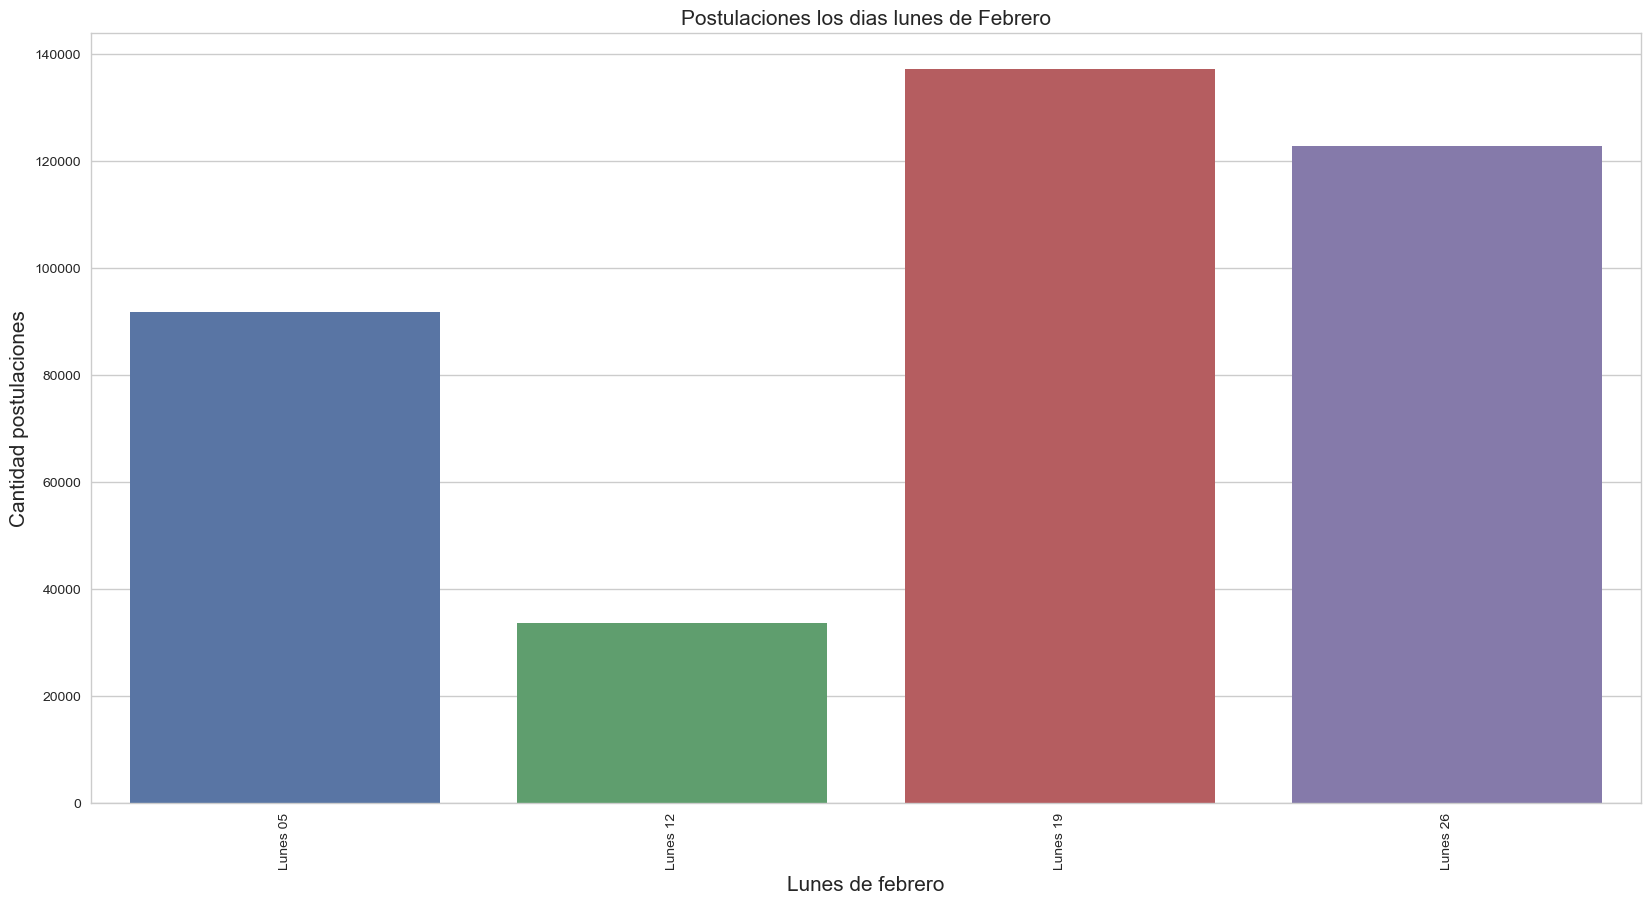

In [31]:
weekTranslation = {'05 - 2da sem feb':'Lunes 05', '06 - 3er sem feb':'Lunes 12', '07 - 4ta sem feb':'Lunes 19', '08 - 5ta sem feb':'Lunes 26'}
postulaciones_lunes_febrero['semana'] = postulaciones_lunes_febrero['semana'].map(lambda x: weekTranslation[x])
g = sns.countplot(x='semana', data=postulaciones_lunes_febrero, order=['Lunes 05', 'Lunes 12', 'Lunes 19','Lunes 26'], orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Lunes de febrero", fontsize=15)
g.set_ylabel("Cantidad postulaciones", fontsize=15)
g.set_title("Postulaciones los dias lunes de Febrero", fontsize=15)

Que paso el Lunes 12 de Febrero? (que aburrido)

2) Averiguar cuál es área de trabajo (nombre_area) sobre la cual se concentra mayor cantidad de ofertas laborales, y dentro de esta área, cuál es la zona (nombre_zona) en donde hay mas demanda.  

In [48]:
avisos_detalle = pd.read_csv('data/fiuba_6_avisos_detalle.csv')
avisos_detalle = avisos_detalle[['idaviso','nombre_area', 'nombre_zona']]
avisos_online = pd.read_csv('data/fiuba_5_avisos_online.csv')
avisos_online = pd.merge(avisos_online, avisos_detalle, on='idaviso', how='inner')

In [49]:
avisos_online.head()

,idaviso,nombre_area,nombre_zona
0,1112355872,Recepcionista,Gran Buenos Aires
1,1112335374,Producción,Gran Buenos Aires
2,1112374842,Comercial,Gran Buenos Aires
3,1111984070,Producto,Gran Buenos Aires
4,1111822480,Comercial,Gran Buenos Aires


In [50]:
top_10_areas=avisos_online['nombre_area'].value_counts().head(10).index
top_10_avisos_online = avisos_online[avisos_online['nombre_area'].isin(top_10_areas)]

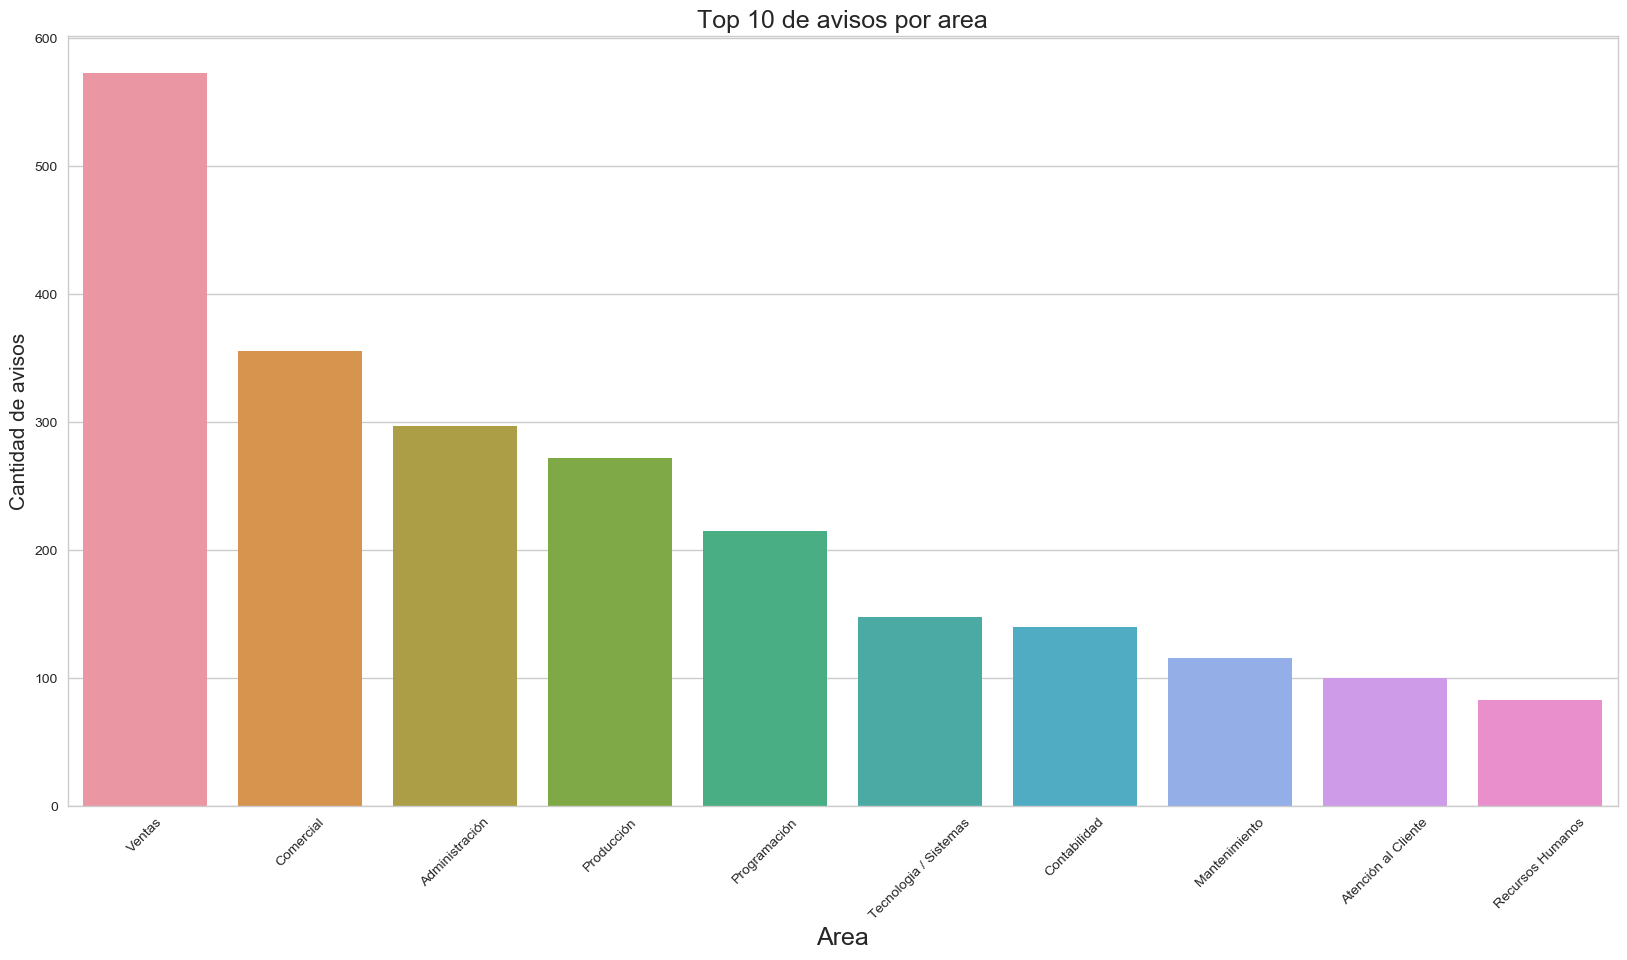

In [45]:
g = sns.countplot(x='nombre_area', data=top_10_avisos_online, order=top_10_areas, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
-g.set_xlabel("Area", fontsize=15)
g.set_ylabel("Cantidad de avisos", fontsize=15)
g.set_title("Top 10 de avisos por area", fontsize=18)

In [52]:
columns_rename = {'idaviso': 'id_aviso', 'nombre_area': 'nombre_area'}
avisos_online = avisos_online.rename(columns=columns_rename)

In [66]:
demanda_avisos_online = pd.merge(avisos_online, postulaciones, on='id_aviso', how='inner')
demanda_avisos_online.head()

,id_aviso,nombre_area,nombre_zona,idpostulante,fecha_postulacion,dia_semana,semana
0,1112355872,Recepcionista,Gran Buenos Aires,ZPWlE,2018-02-22 13:38:32,Jueves,07 - 4ta sem feb
1,1112355872,Recepcionista,Gran Buenos Aires,NNvzeB,2018-02-24 15:23:23,Sabado,07 - 4ta sem feb
2,1112355872,Recepcionista,Gran Buenos Aires,5qvovM,2018-02-24 13:30:45,Sabado,07 - 4ta sem feb
3,1112355872,Recepcionista,Gran Buenos Aires,Zrx8Xz,2018-02-26 07:57:33,Lunes,08 - 5ta sem feb
4,1112355872,Recepcionista,Gran Buenos Aires,5PE0Vz,2018-02-27 17:18:52,Martes,08 - 5ta sem feb


In [60]:
demanda_avisos_online_ventas = demanda_avisos_online[demanda_avisos_online['nombre_area']=='Ventas']
demanda_avisos_online_ventas['nombre_zona'].value_counts()

Gran Buenos Aires    164938
Capital Federal        8113
Name: nombre_zona, dtype: int64

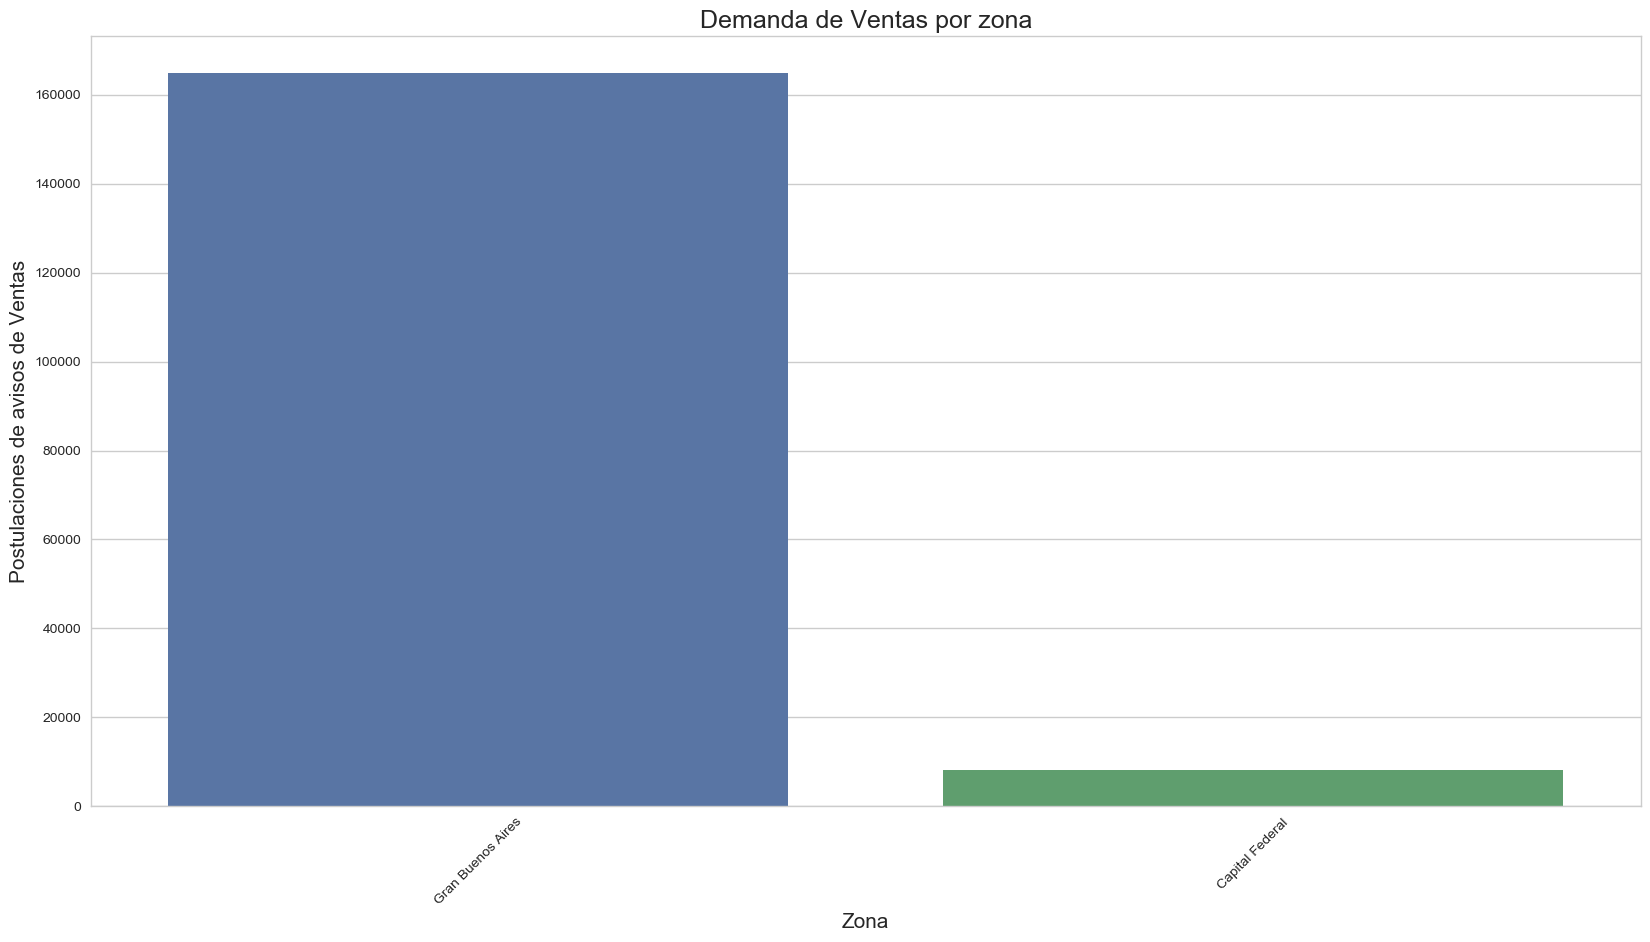

In [61]:
g = sns.countplot(x='nombre_zona', data=demanda_avisos_online_ventas, order=demanda_avisos_online_ventas['nombre_zona'].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Zona", fontsize=15)
g.set_ylabel("Postulaciones de avisos de Ventas", fontsize=15)
g.set_title("Demanda de Ventas por zona", fontsize=18)

In [71]:
demanda_avisos_online_top_10 = demanda_avisos_online[demanda_avisos_online['nombre_area'].isin(top_10_areas)]
for_heatmap = demanda_avisos_online_top_10.pivot_table(index='nombre_area', columns='nombre_zona', values='fecha_postulacion', aggfunc='count')

In [69]:
for_heatmap.head()

nombre_zona,Capital Federal,Gran Buenos Aires
nombre_area,,
Abastecimiento,58.0,4592.0
Administracion de Seguros,NaN,1206.0
Administración,7925.0,112083.0
Administración de Base de Datos,NaN,13.0
Administración de Personal,429.0,12594.0


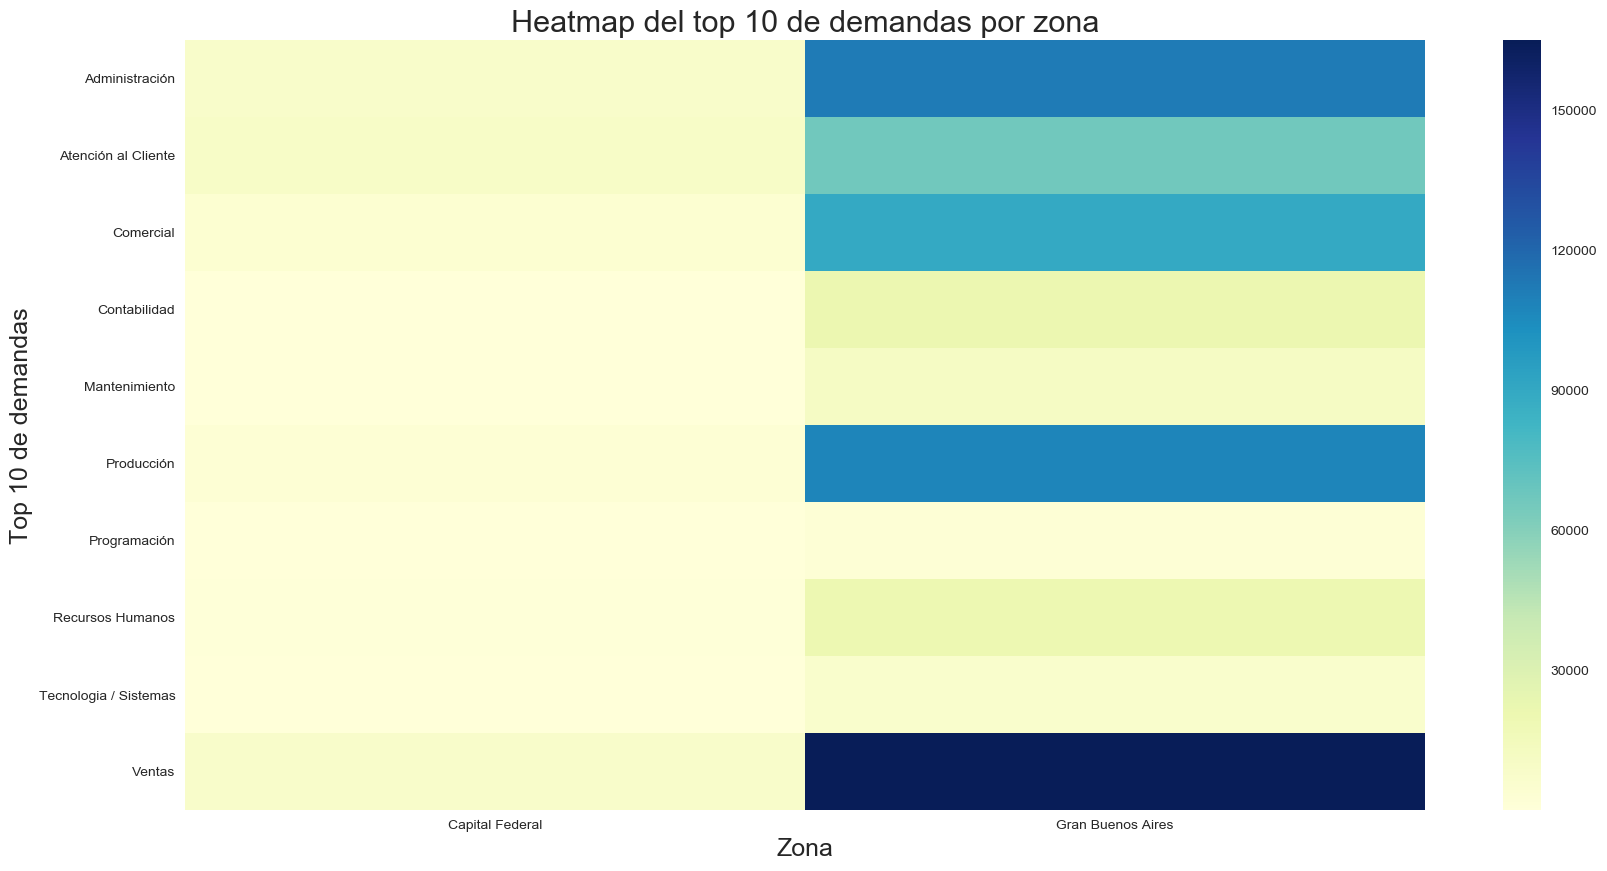

In [72]:
g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Heatmap del top 10 de demandas por zona", fontsize=22)
g.set_xlabel("Zona",fontsize=18)
g.set_ylabel("Top 10 de demandas", fontsize=18)